[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Answers%20to%20Exercises/Python/Power%20Analysis%20Exercise%20Answers.ipynb)

Below are answers to the exercises described [here](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Concepts/Python/Error%20Types%2C%20P-Values%2C%20False-Positive%20Risk%2C%20and%20Power%20Analysis.ipynb)

# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Concepts/PowerAnalysisExample1.m" and "Concepts/PowerAnalysisExample2.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower

Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes. Notes and tips:

1. Given that the data have already been collected, note that this is technically a "post-hoc" power analysis and is for demonstration purposes only. Normally these analyses must be done **before** collecting data.
2. Assume that a "data sample" is simply the non-parametric correlation coefficient between pupil diameter and LC activty measured in a given session.
3. Thus, to obtain a null distribution of these data samples, compute the correlation coefficients on simulated data that are independently generated from Poisson (for LC spiking data) and Gaussian (for pupil data)distributions.
4. Then plot n (number of data samples, corresponding to correlation coefficients measured in a single expermental session) needed for 80% power as a function of effect sizes.
5. To compute power, you can use TTestIndPower in Python, or sampsizepwr in Matlab

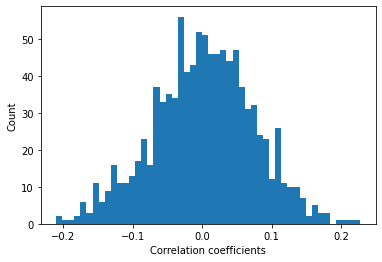

correlations mean=0.00, std=0.07


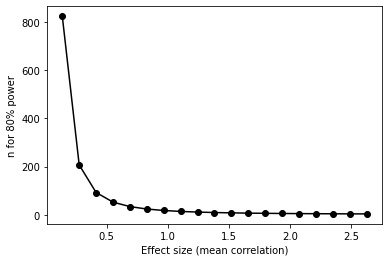

In [ ]:
# First create a null distribution of "no relationship between LC spike 
#   rate and pupil size" by simulateing a bunch of "experiments" with no 
#   effect. Here we are assuming that LC spike counts are poisson distributed 
#   with a rate of 1 Hz, and pupil has already been z-scored (so the mean is 
#   zero and the std is one)
trials_per_experiment  = 200
num_experiments = 1000
spike_rates = st.poisson.rvs(2, size=(trials_per_experiment, num_experiments))
pupils = np.random.normal(0, 1, (trials_per_experiment, num_experiments))

correlations = np.zeros(num_experiments)
for ii in np.arange(num_experiments):
    correlations[ii], _ = st.spearmanr(spike_rates[:,ii], pupils[:,ii])    

plt.hist(correlations, bins=50)
plt.xlabel('Correlation coefficients')
plt.ylabel('Count')
plt.show()
print(f'correlations mean={np.mean(correlations):.2f}, std={np.std(correlations):.2f}')

# We can perform a power analysis to find the n needed for different effect sizes at a given power (here 80%):
desired_power = 0.8

# Define a bunch of possible effect sizes
effect_sizes = np.arange(0.01, 0.2, 0.01)/np.std(correlations)

# Compute ns, using tt_ind_solve_power 
#  https://www.statsmodels.org/stable/stats.html#power-and-sample-size-calculations
ns = np.zeros(np.size(effect_sizes))
for idx, val in enumerate(effect_sizes):
  obj = TTestIndPower()
  ns[idx] = obj.solve_power(effect_size=val, alpha=0.05, power=desired_power)

# Plot n vs effect size, where effect_size is re-scaled to std of null distribution
plt.plot(effect_sizes, ns, 'ko-')
plt.xlabel('Effect size (mean correlation)')
plt.ylabel('n for 80% power')
plt.show()

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania